In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.integrate import nquad
%matplotlib inline

In [2]:
nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])

(7.866842992401425, 8.733950221275128e-14)

In [12]:
def printer(name):
    base=np.genfromtxt(name+"(base-level5).txt",delimiter=',')
    ee=np.genfromtxt(name+"(e-level5).txt",delimiter=',')
    ef=np.genfromtxt(name+"(f-level5).txt",delimiter=',')
    eg=np.genfromtxt(name+"(g-level5).txt",delimiter=',')
    baserows=base.view([('',base.dtype)]*base.shape[1])
    eerows=ee.view([('',ee.dtype)]*ee.shape[1])
    efrows=ef.view([('',ef.dtype)]*ef.shape[1])
    egrows=eg.view([('',eg.dtype)]*eg.shape[1])
    eedif=np.setdiff1d(eerows,baserows).view(ee.dtype).reshape(-1,ee.shape[1])
    efdif=np.setdiff1d(efrows,baserows).view(ef.dtype).reshape(-1,ef.shape[1])
    egdif=np.setdiff1d(egrows,baserows).view(eg.dtype).reshape(-1,eg.shape[1])
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(eedif[:,0],eedif[:,1],".r")
    plt.title(name +" (e)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(efdif[:,0],efdif[:,1],".r")
    plt.title(name +" (f)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(egdif[:,0],egdif[:,1],".r")
    plt.title(name +" (g)")
    df=pd.read_csv(name+".txt",header=None)
    display(df)
    ye=nquad(lambda x,y: (x**3-y**2),[[-1,1],[-1,1]])
    ye2=nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-4),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='x^3-x^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='1+(sin(x)+cos(x))/e^x')
    plt.legend()
    plt.title(name + " Integrationsfehler")
    plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[5]),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[4]),label='x^3-x^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[6]),label='1+(sin(x)+cos(x))/e^x')
    plt.legend()
    plt.title(name + " Approximationsfehler")

    plt.savefig(name+"_approximationsfehler.png")
    plt.show()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.000000,4.000000,8.000000,1.600000e+01,32.000000,64.000000,128.000000,256.000000,512.000000,1024.000000,2048.000000,4096.000000,8192.000000,NaN
1,0.000000,0.000000,0.000000,-1.437500e+00,-1.359375,-1.338867,-1.334839,-1.333694,-1.333424,-1.333356,-1.333339,-1.333335,-1.333334,NaN
2,0.000000,0.000000,0.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN
3,0.000000,0.000000,0.000000,7.868829e+00,7.867256,7.867250,7.866922,7.866866,7.866849,7.866845,7.866843,7.866843,7.866843,NaN
4,0.000008,0.000005,0.000097,1.205613e-05,0.000028,0.000050,0.000100,0.000186,0.000384,0.000778,0.001516,0.003150,0.006193,NaN
5,0.000020,0.000040,0.000080,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
6,0.000058,0.000075,0.000451,3.436981e-07,0.000001,0.000003,0.000004,0.000008,0.000018,0.000034,0.000070,0.000136,0.000282,NaN


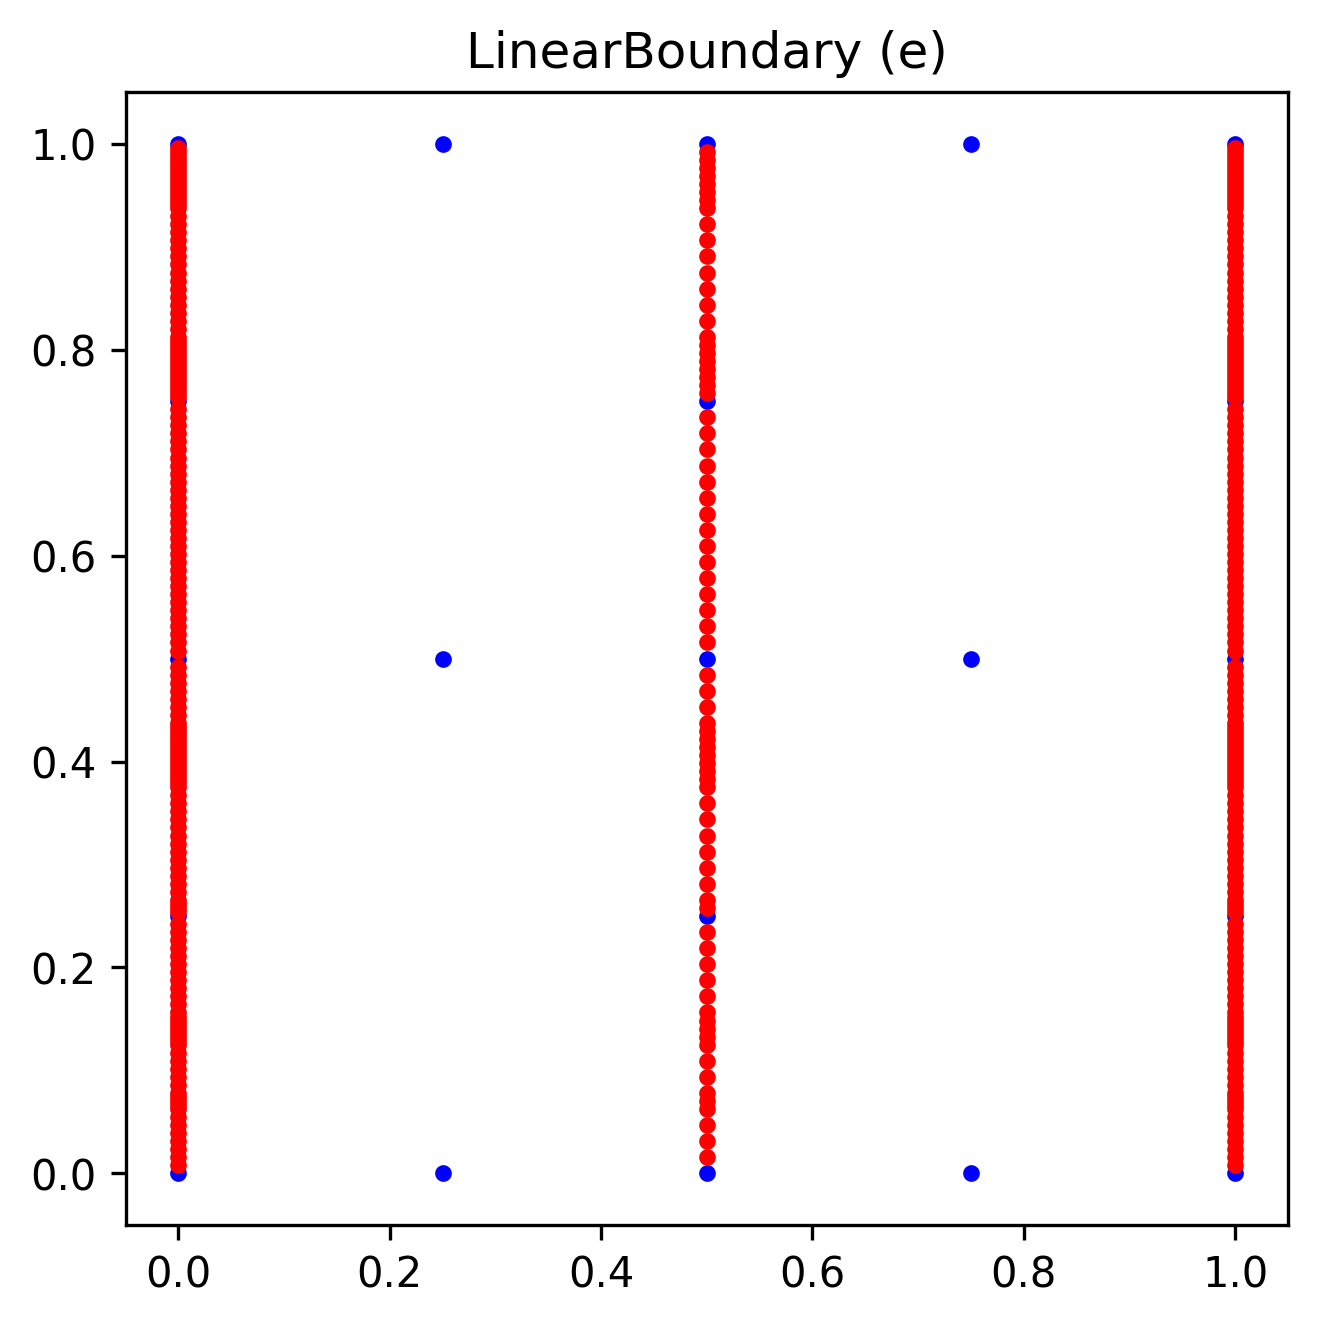

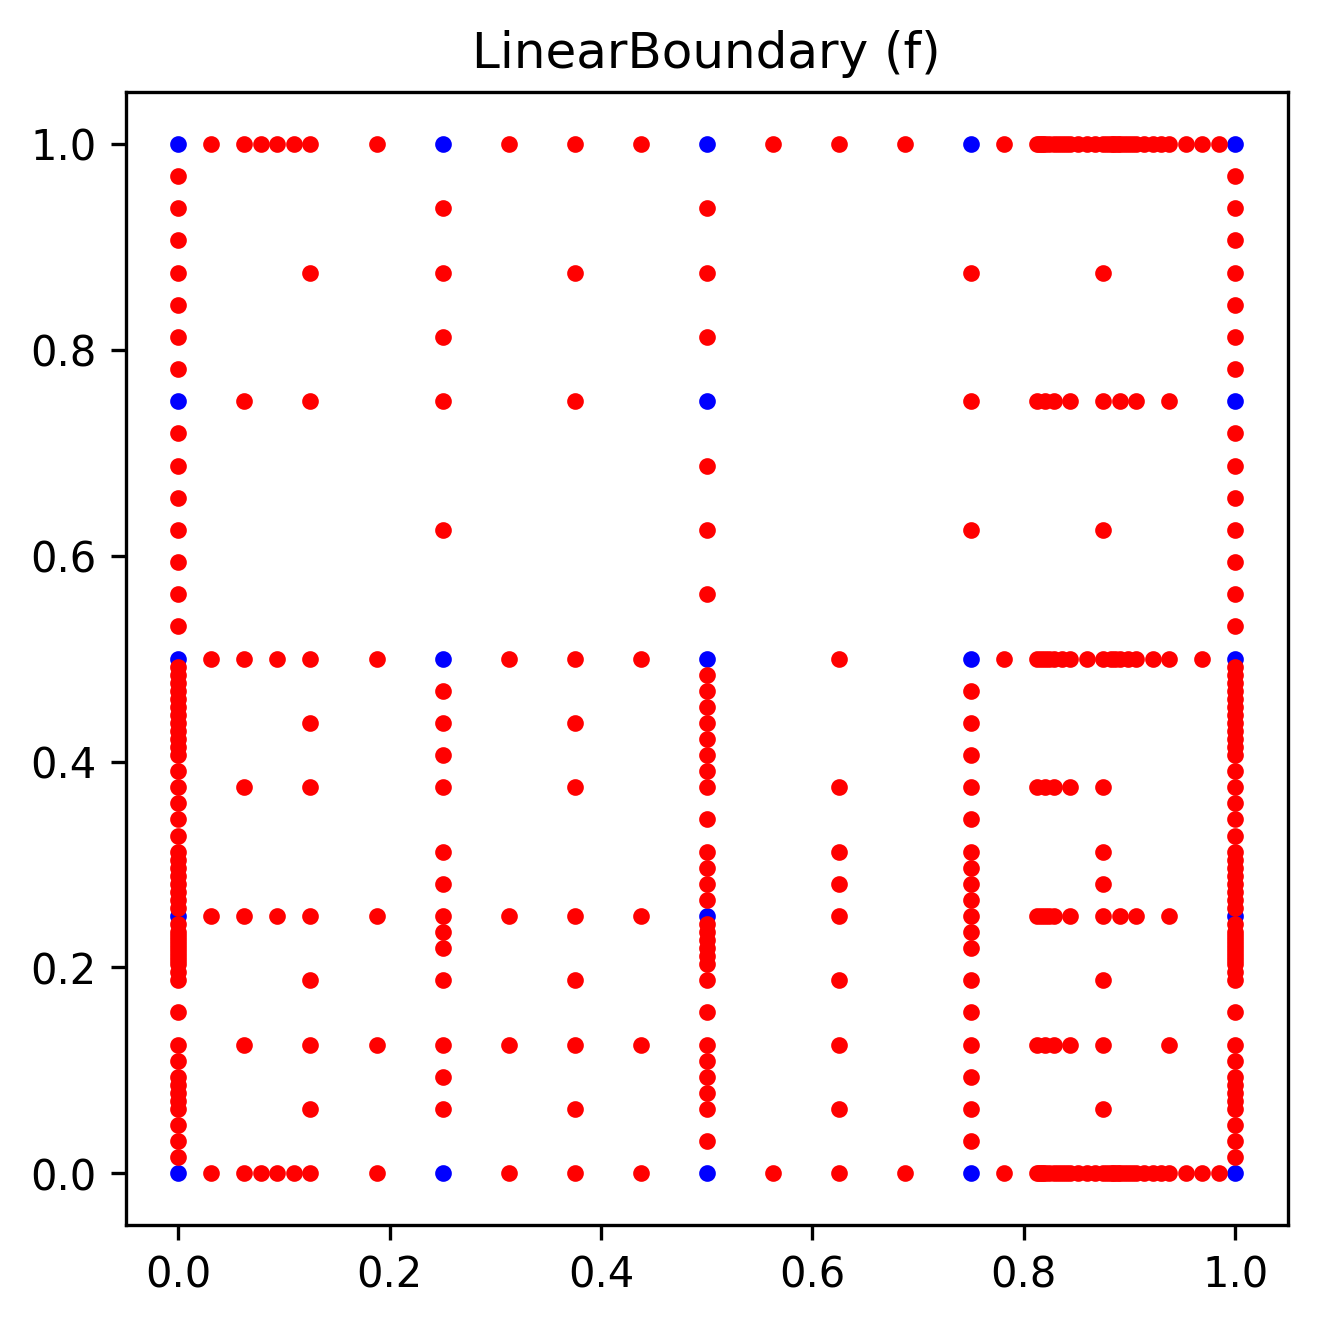

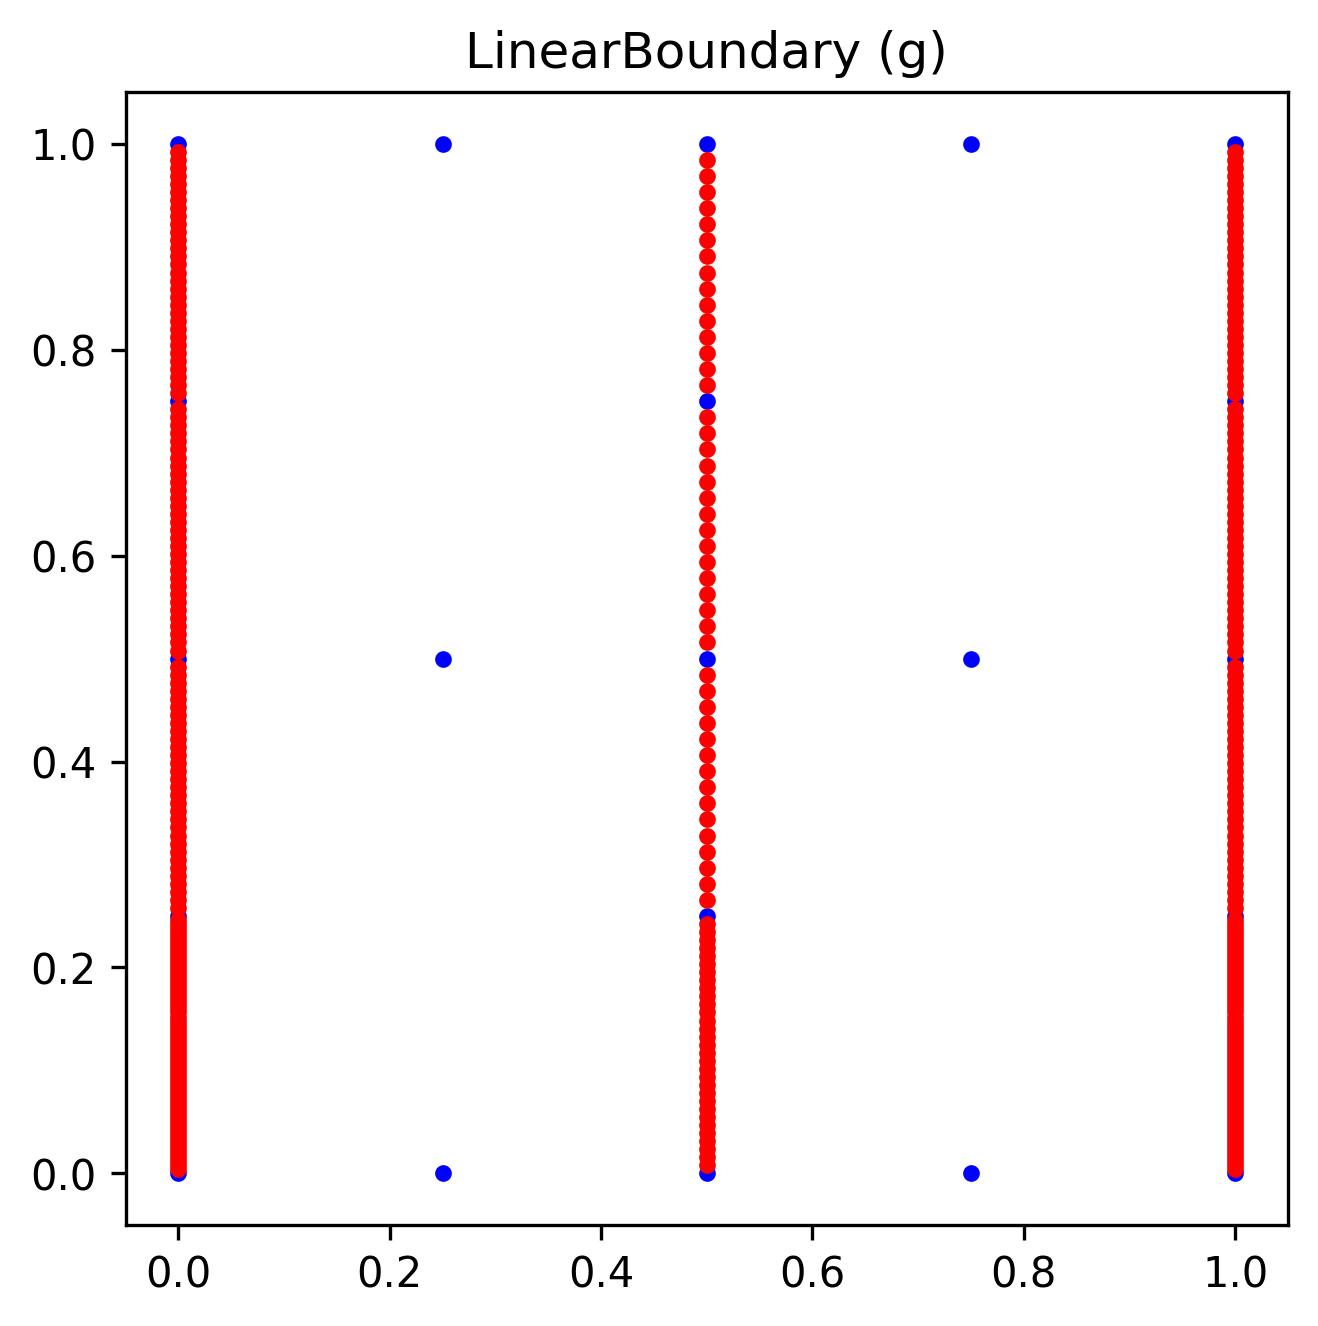

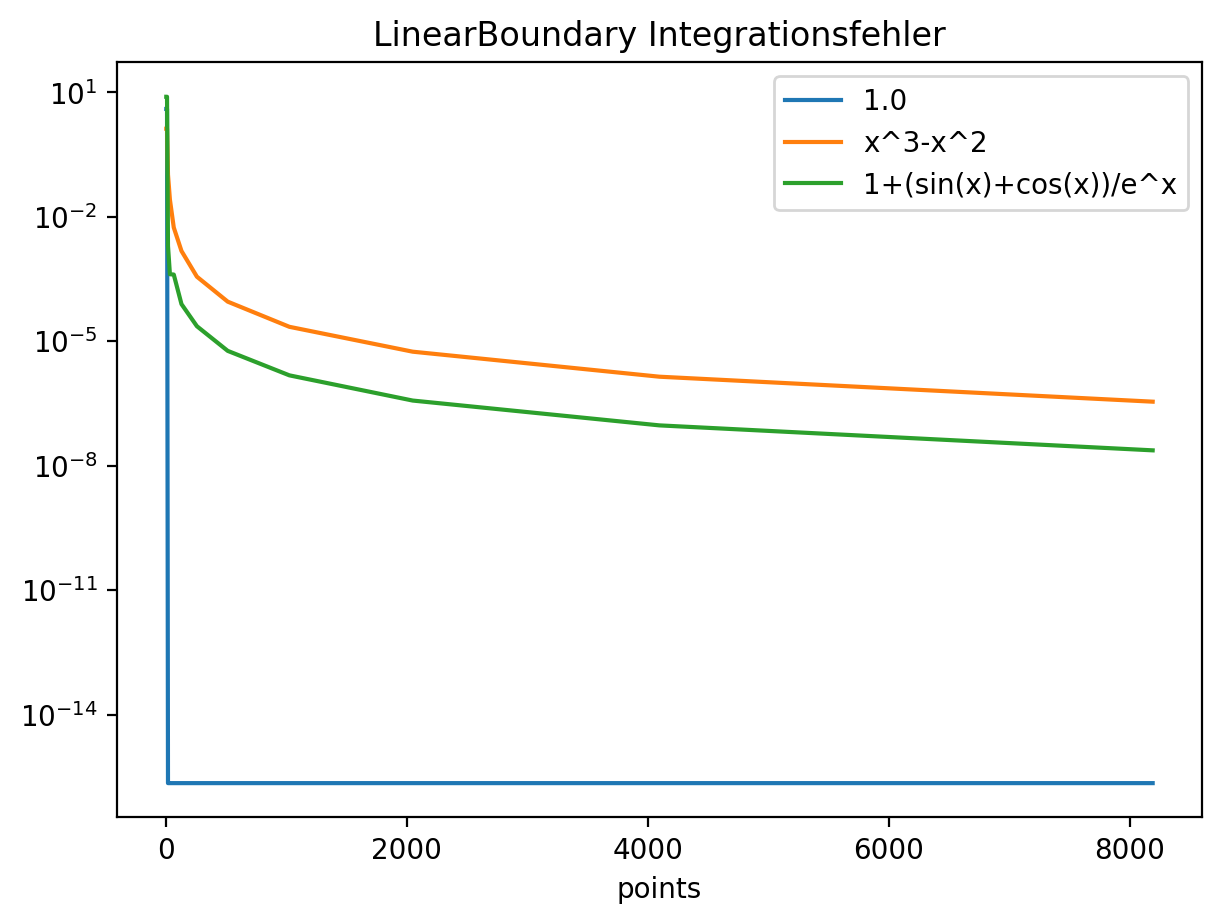

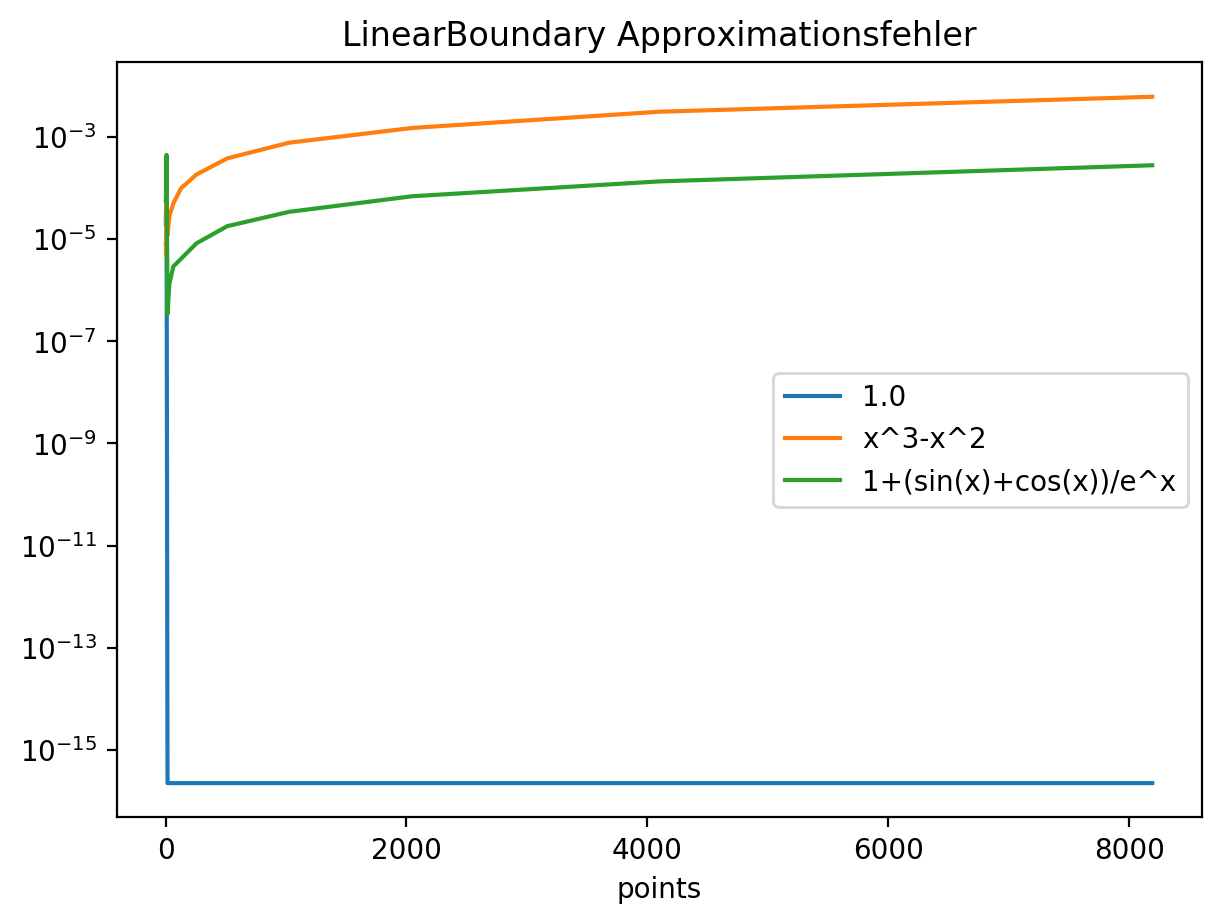

In [17]:
printer("LinearBoundary")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.000000,4.000000,8.000000,1.600000e+01,32.000000,64.000000,128.000000,256.000000,512.000000,1024.000000,2048.000000,4096,8192,NaN
1,0.000000,0.000000,0.000000,-1.333333e+00,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,51542218062368005170841780224.0000000000000000000,53265696390311955371929894912.0000000000000000000,NaN
2,0.000000,0.000000,0.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000000000000000000,4.0000000000000000000,NaN
3,0.000000,0.000000,0.000000,7.865104e+00,7.866732,7.866838,7.866843,7.866843,7.866843,7.866843,7.866843,7.8668429924010769838,7.8668429924013150156,NaN
4,0.000006,0.000007,0.000028,1.327717e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0472958189709426213,0.1180065984533151674,NaN
5,0.000020,0.000040,0.000080,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000000000000000,0.0000000000000000000,NaN
6,0.000046,0.000115,0.000221,2.947463e-07,0.000001,0.000002,0.000004,0.000008,0.000019,0.000036,0.000065,0.0001366098655462444,0.0002797340492038347,NaN


TypeError: unsupported operand type(s) for -: 'str' and 'int'

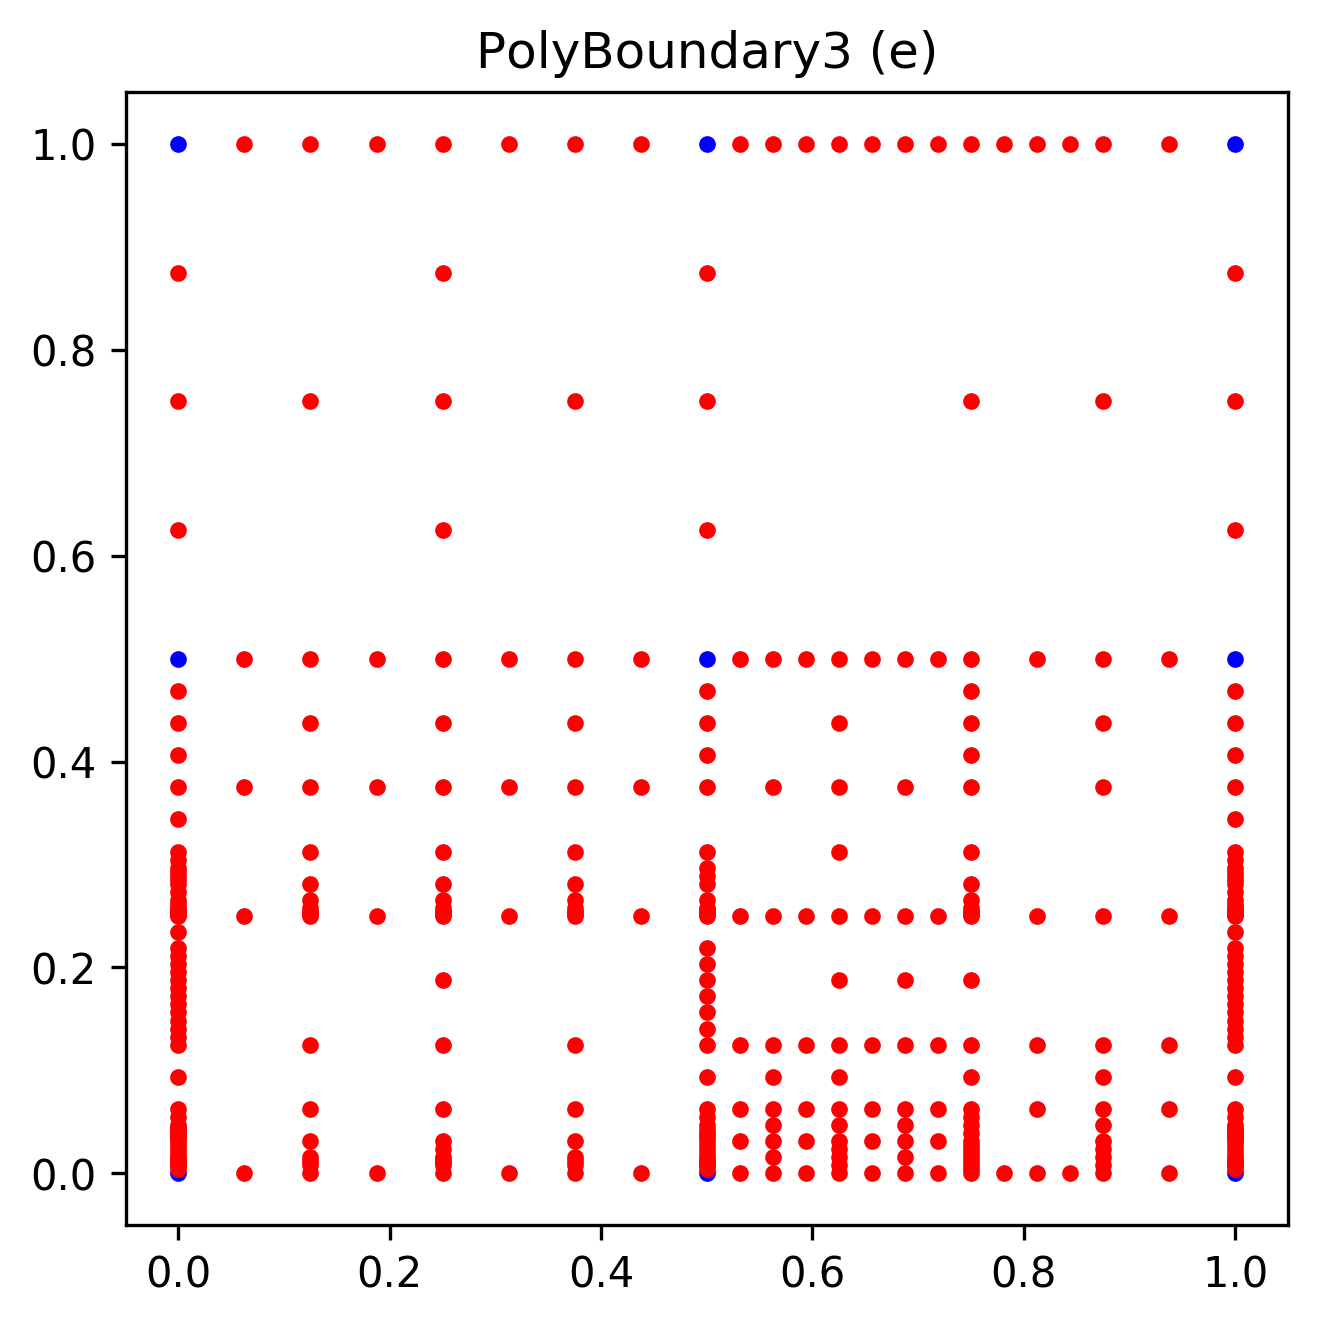

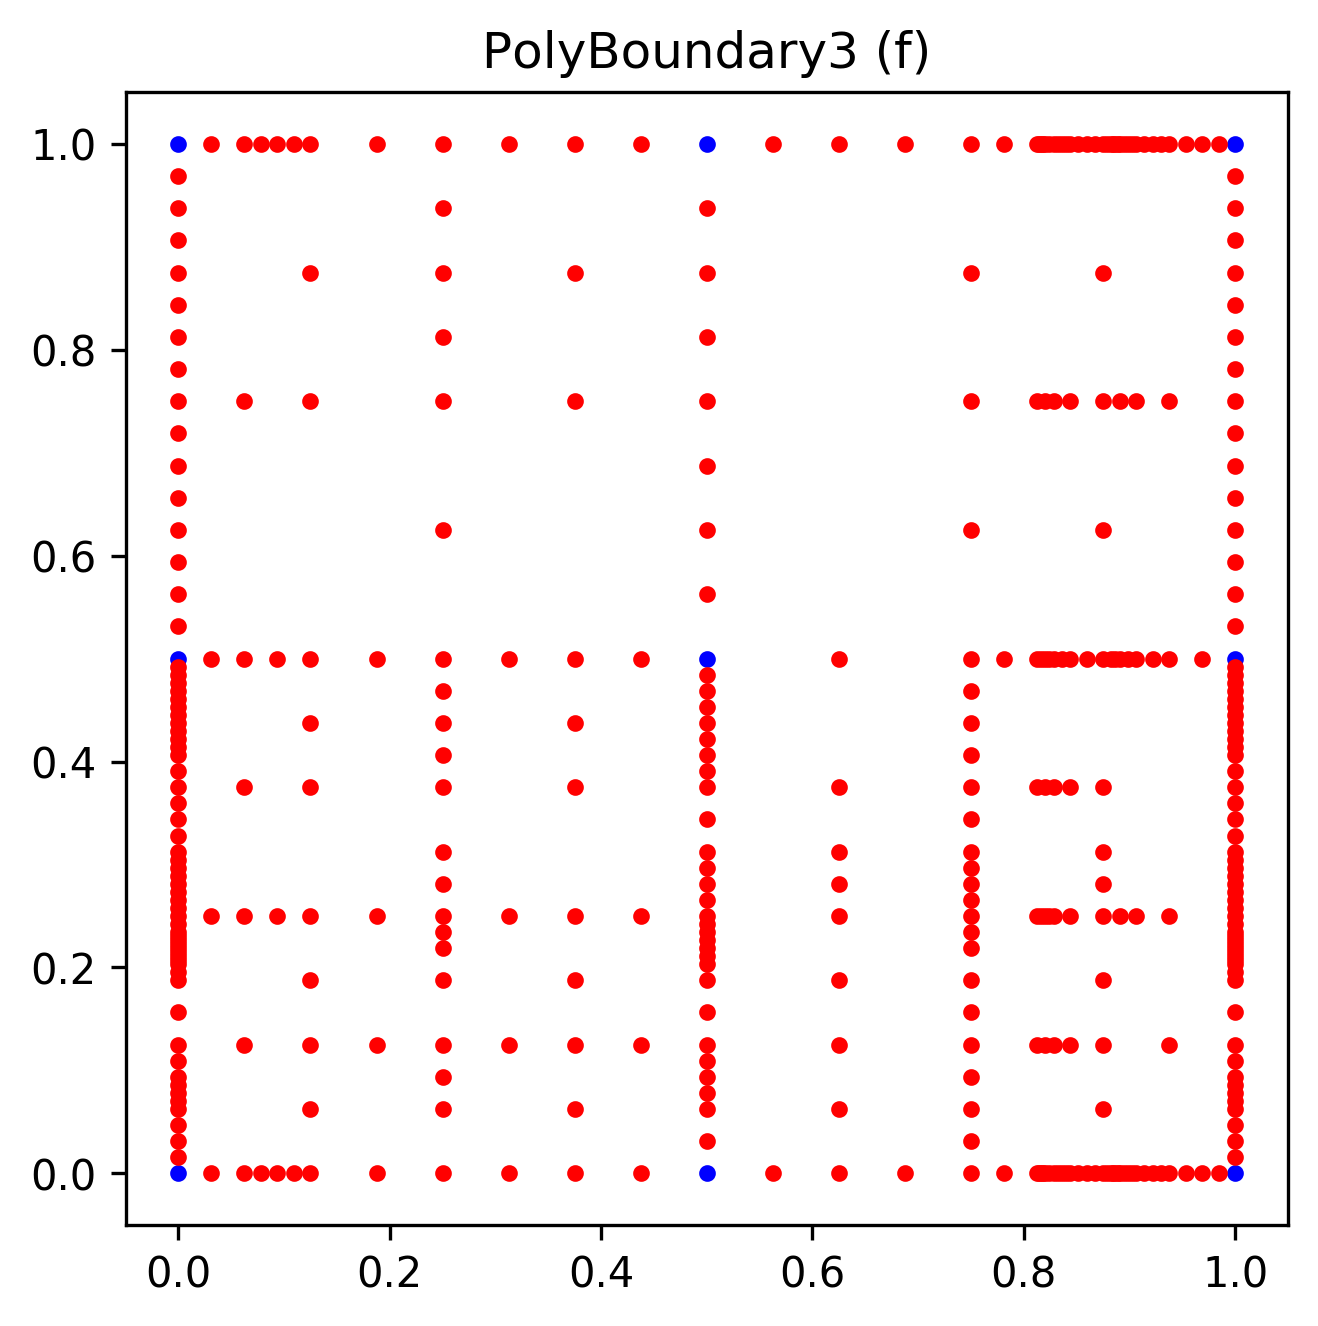

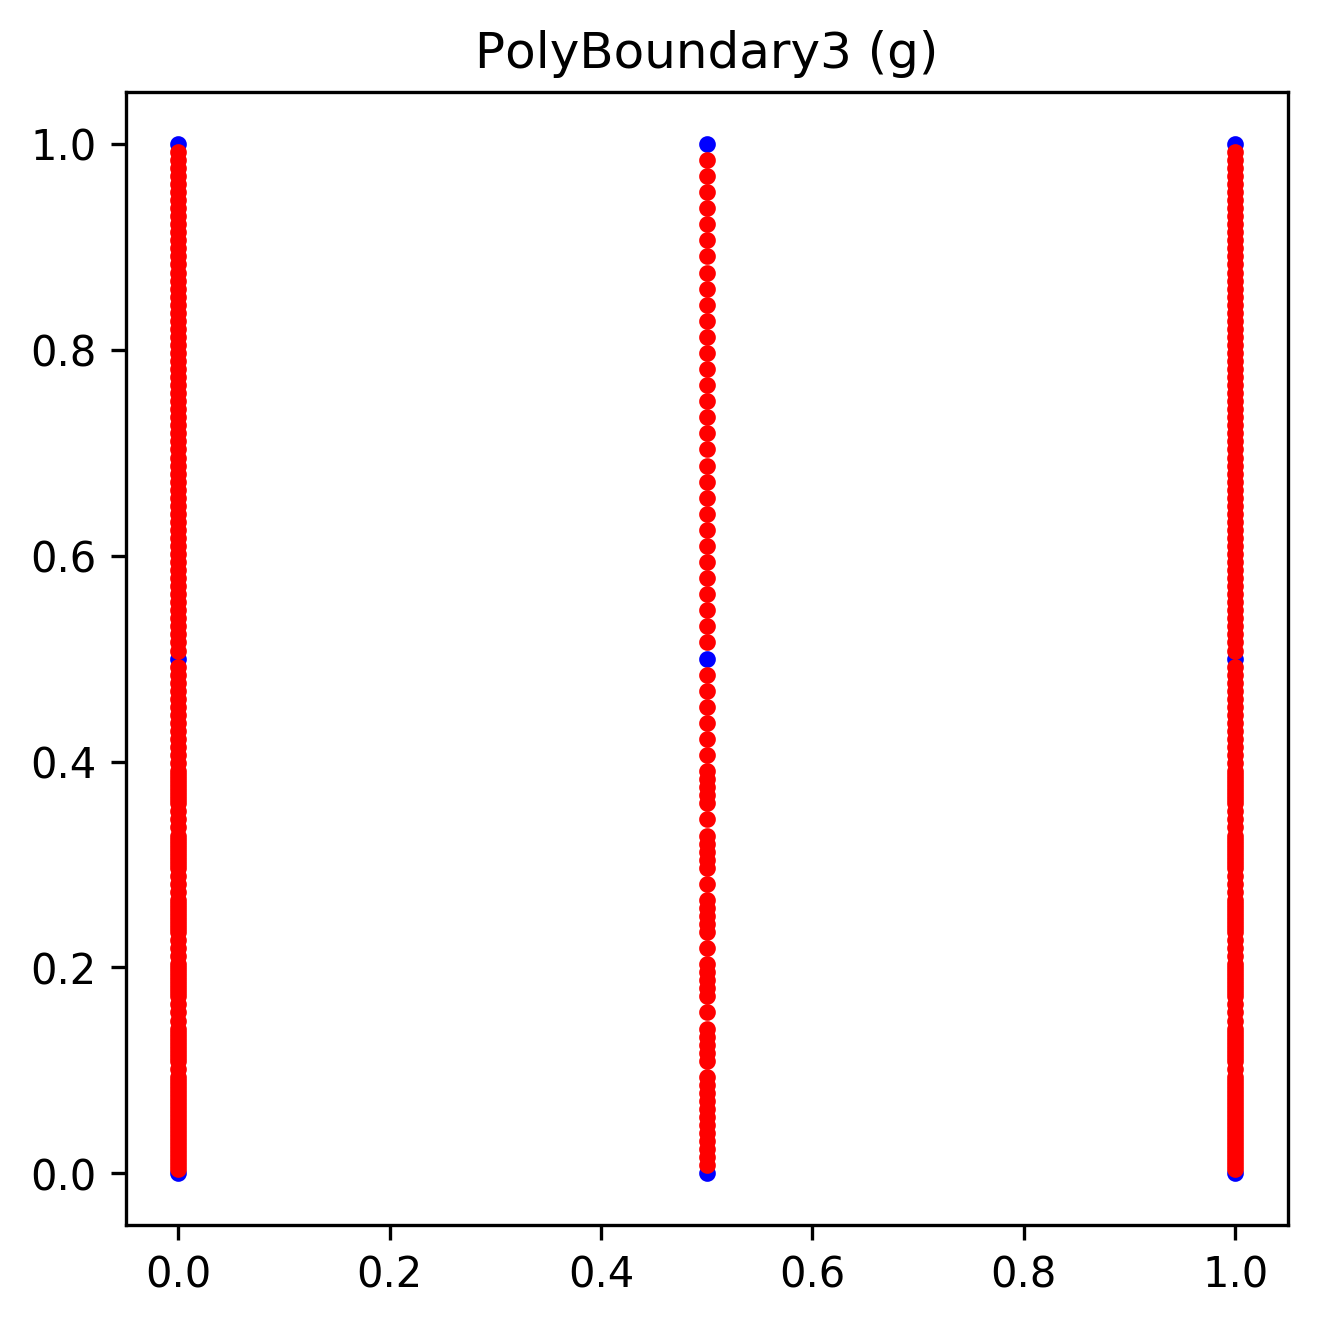

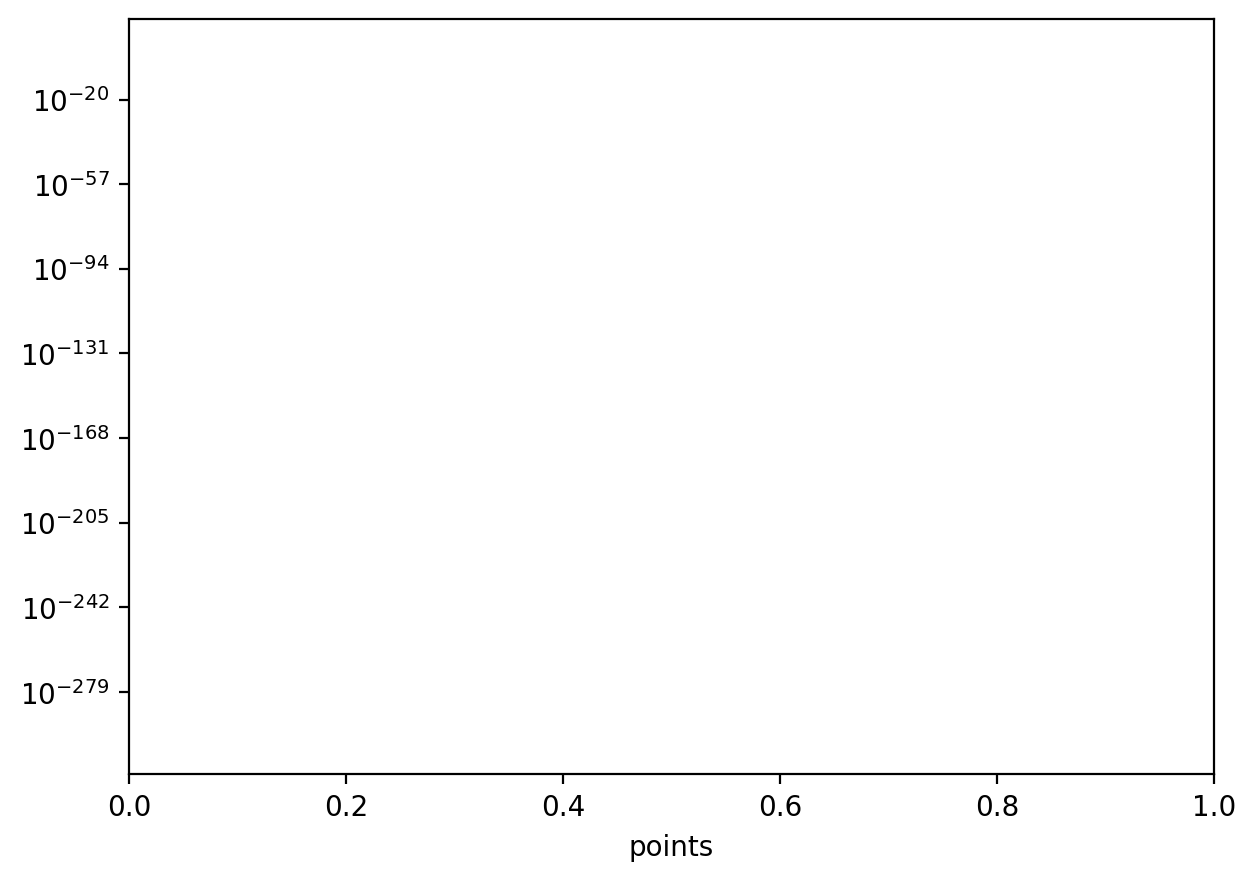

In [19]:
printer('PolyBoundary3')

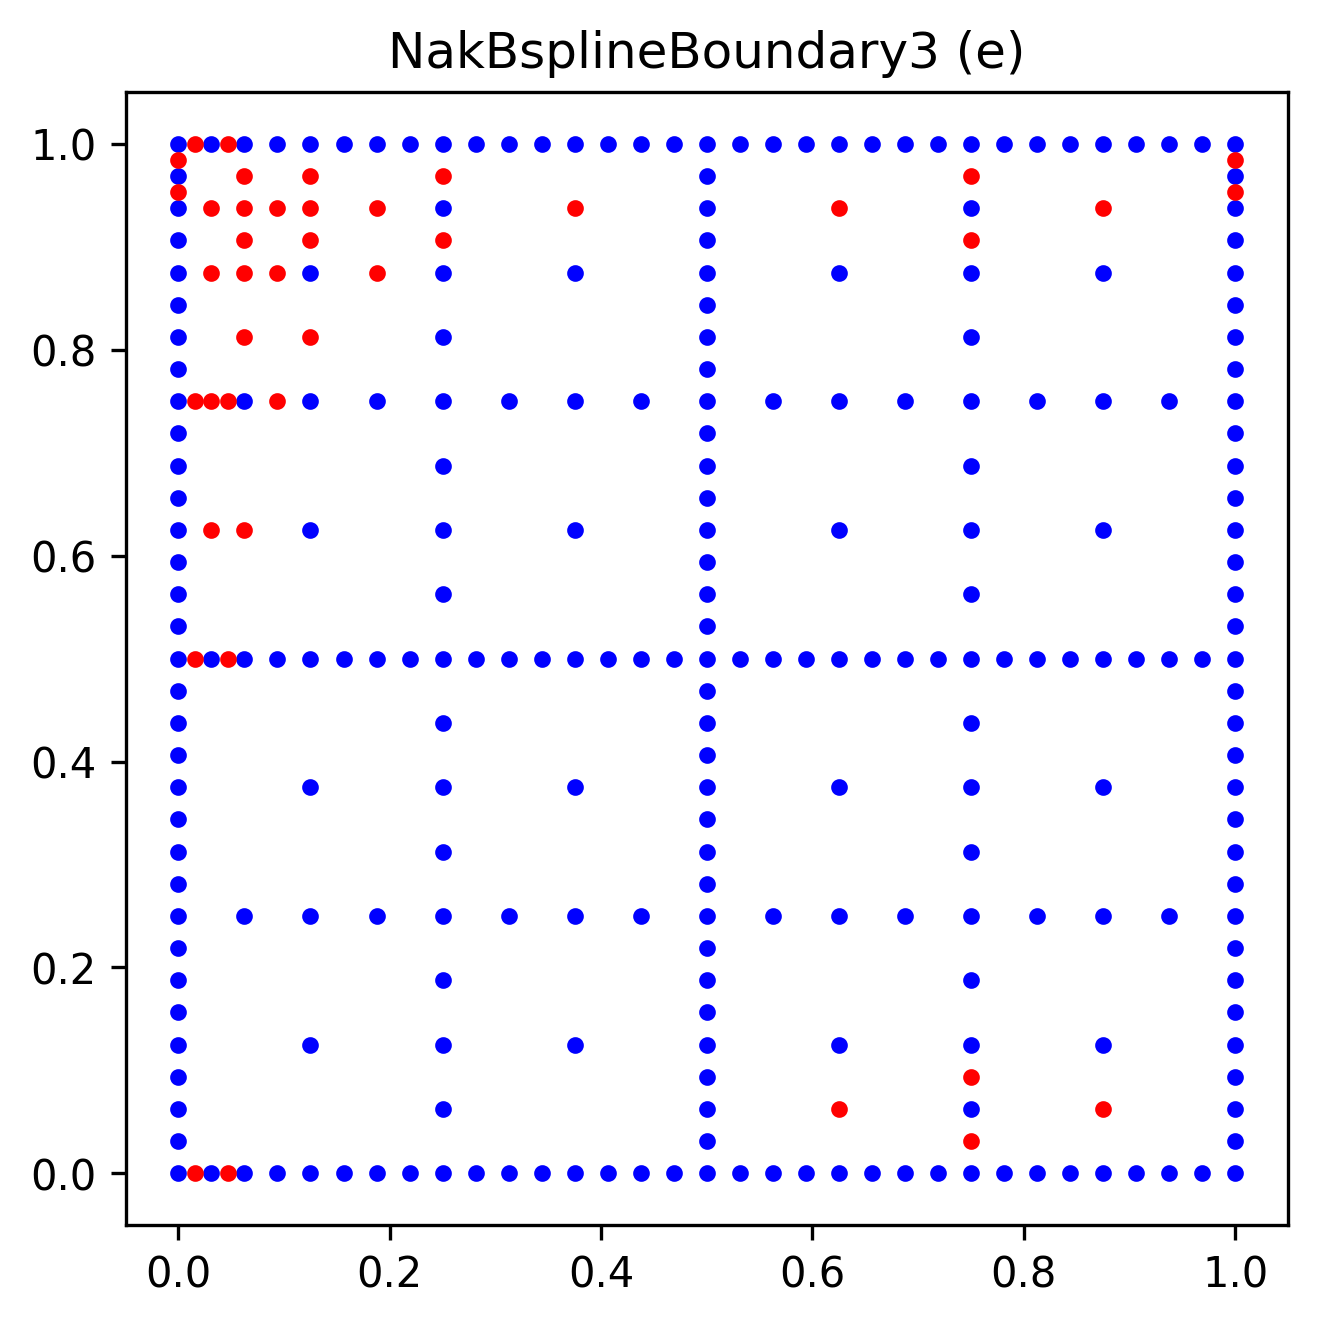

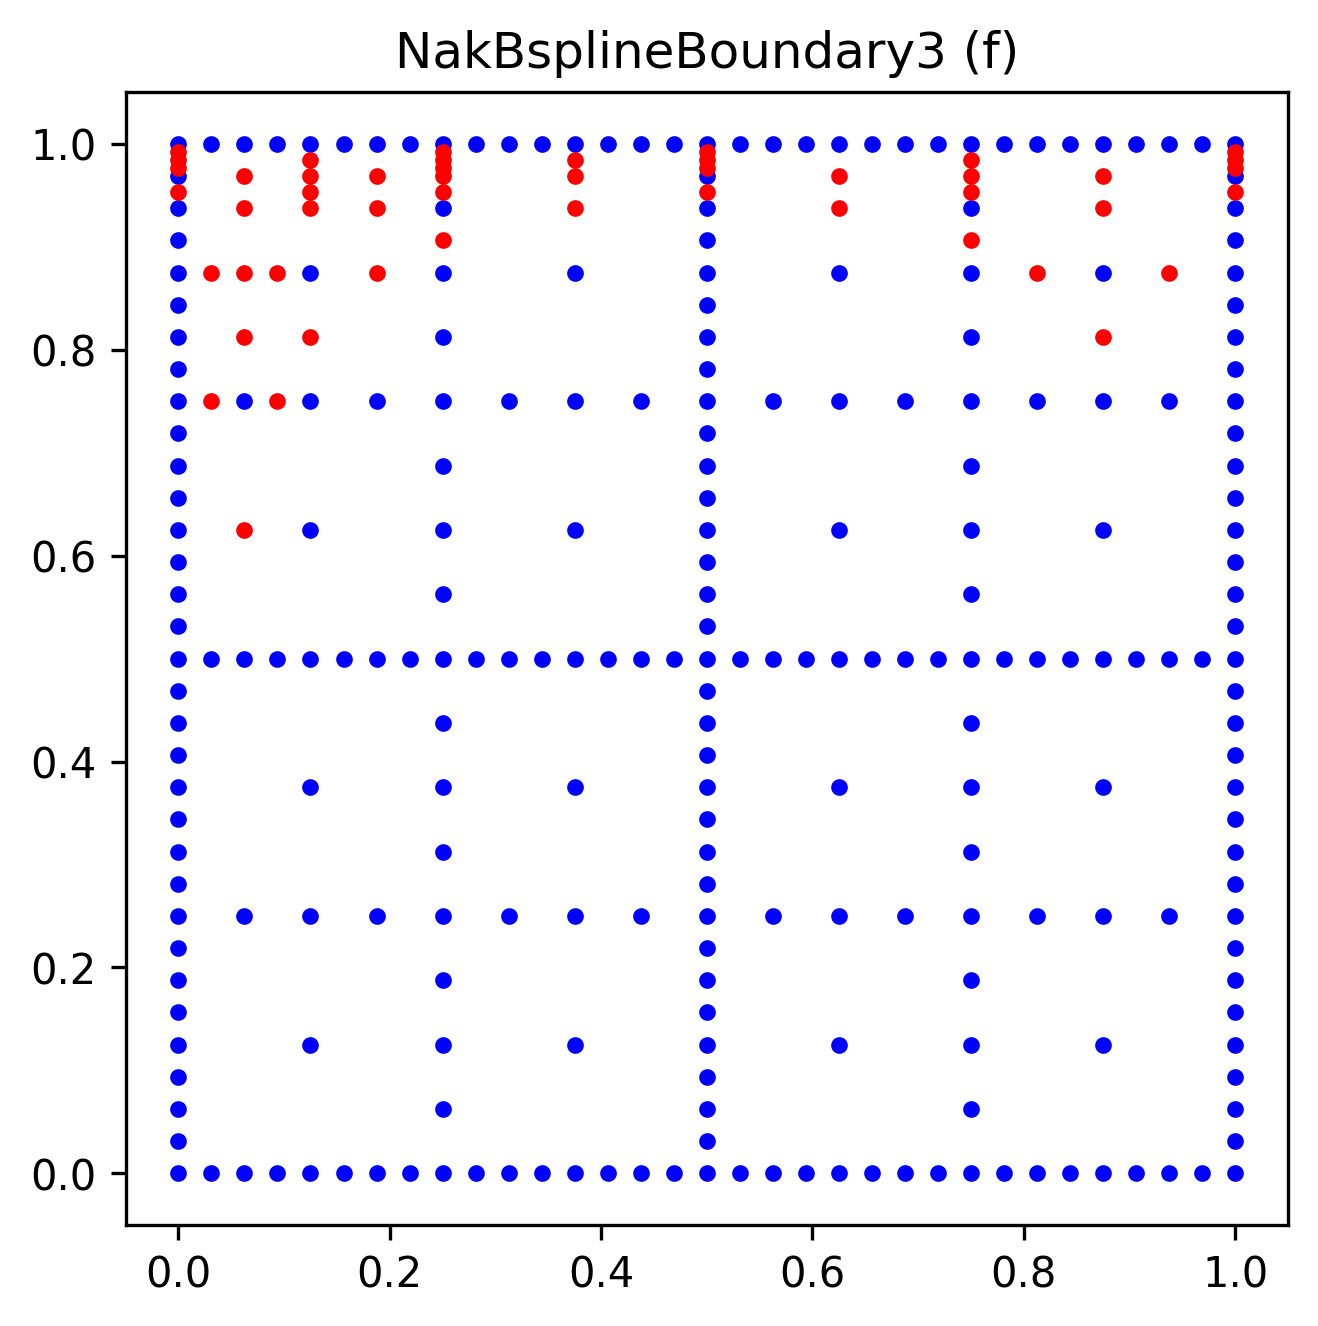

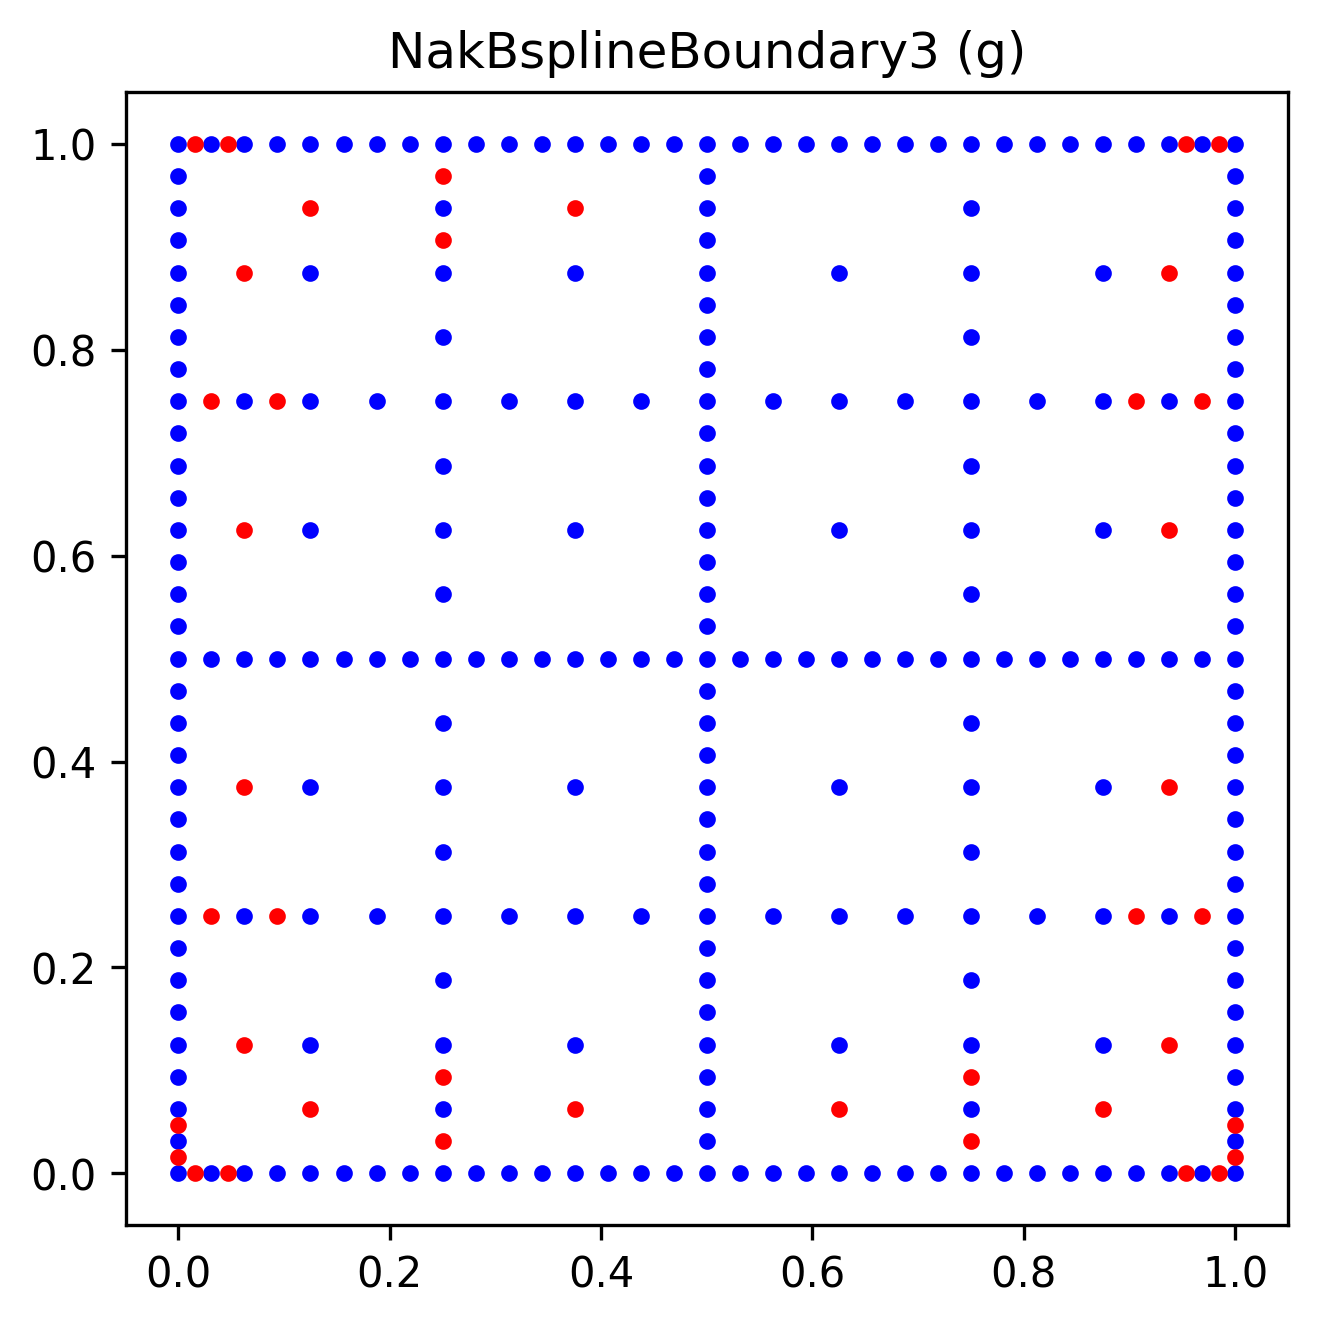

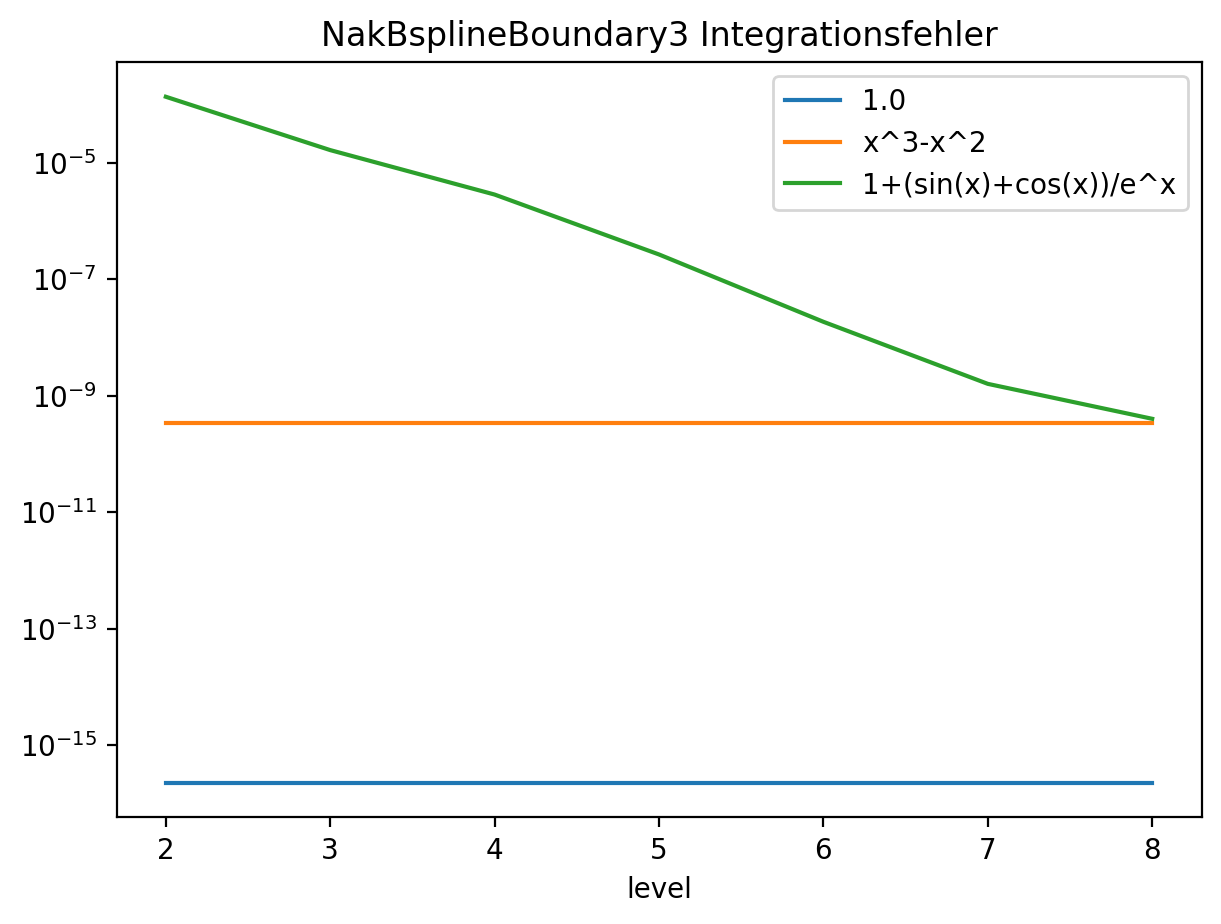

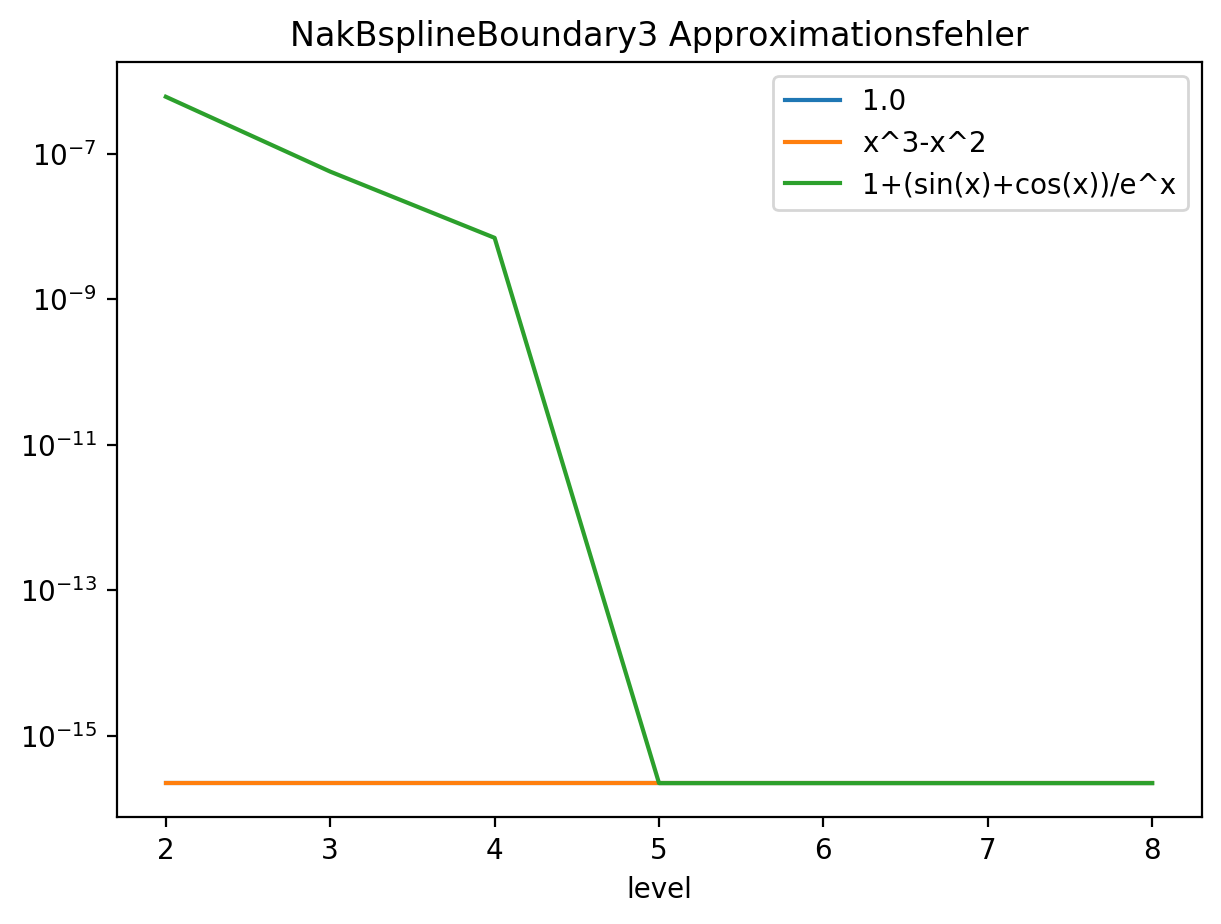

In [9]:
printer('NakBsplineBoundary3')